In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.models as models

from texture_synth import run_texture_synthesis, histogram_matching

from PIL import Image

In [2]:
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension

def register_extensions(id, extensions): 
    for extension in extensions: register_extension(id, extension)

Image.register_extensions = register_extensions

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = models.vgg19(pretrained=True).features.to(device).eval()
image_size = 256 if torch.cuda.is_available() else 128
num_steps = 2000 if torch.cuda.is_available() else 300

In [5]:
texture = 'soil.jpg'    
texture_image = Image.open(texture)
synthesized_img = run_texture_synthesis(cnn, texture_image, image_size, 
                                        num_steps, device, verbose=False)
synthesized_img = Image.fromarray(histogram_matching(np.array(synthesized_img), 
                                                     np.array(texture_image)))

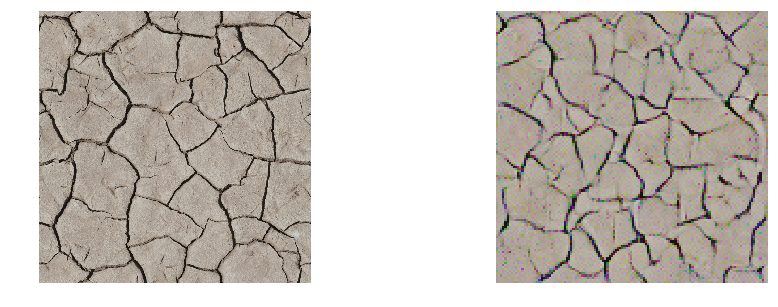

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(texture_image)
ax1.axis('off')

ax2.imshow(synthesized_img)
ax2.axis('off');